Project Members: Sidonia Summers, Rowan Wilson, Ben Calhoun, Abigail Simanjuntak

Country Happiness Project

CS3540: Machine Learning

Mounting to google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Importing necessary libraries for the project

In [26]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from past.builtins import xrange
from scipy.special import expit
import seaborn as sns

%matplotlib inline

Adding the google path


In [4]:
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'CS3540/CS3540-Project/' # change this directory to yours
GOOGLE_DRIVE_PATH = os.path.join('drive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['.DS_Store', 'data', 'Country-Happiness-Project.ipynb']


Loading in the data

In [5]:
path1 = GOOGLE_DRIVE_PATH + 'data/WorldHappinessReport2024.csv'
df_world_happiness = pd.read_csv(path1)

path2 = GOOGLE_DRIVE_PATH + 'data/CountryComparisonLargeDataset.csv'
df_country_comparison = pd.read_csv(path2)


#display part of the dataset.
display(df_world_happiness.head())
display(df_country_comparison.head())

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919


,Country,Year,GDP (in Trillions USD),GDP per Capita (in USD),Inflation Rate (%),Population (in Millions),Population Growth Rate (%),Urban Population (%),Life Expectancy (Years),Healthcare Expenditure per Capita (USD),...,Poverty Rate (%),Number of International Visitors (in Millions),Tourism Revenue (in Billion USD),Agricultural Land (%),Unemployment Rate (%),Labor Force Participation Rate (%),"Crime Rate (per 100,000)",Corruption Perception Index,Freedom of Press Index,Voting Participation Rate (%)
0,USA,2000,20.87,65455.0,2.28,330.34,0.58,83.42,78.39,11209.00,...,10.98,80.80,210.98,42.37,3.55,65.52,287.40,67.41,45.27,68.81
1,Russia,2000,1.64,10923.0,3.25,141.81,0.10,72.67,69.91,534.45,...,12.89,24.70,36.47,12.53,4.63,57.54,497.50,30.90,146.10,65.00
2,Canada,2000,1.65,47932.0,1.96,36.63,0.90,79.54,84.60,5113.50,...,9.46,22.33,29.52,7.22,5.43,65.06,795.20,74.74,16.42,63.00
3,China,2000,13.64,10060.0,2.43,1446.93,0.31,58.56,76.09,459.00,...,2.04,62.20,115.80,54.00,3.68,63.13,102.90,41.75,185.32,72.14
4,India,2000,2.98,2102.1,4.87,1313.76,1.04,34.09,68.78,76.07,...,22.25,11.25,29.12,57.60,7.31,52.10,245.25,40.12,136.36,67.65


Exploring, cleaning, etc the world happiness dataset

Cleaning:
Remove rows with missing values
Overview of each feature, ensure all values make sense
Removing whitespace
Correcting mispelled words
Detecting and fixing outliers
Fixing formatting errors

Six countries we will predict:
- Usa
- Russia
- China
- India
- Canada
- Austrailia


In [7]:
df_world_happiness.info()
df_world_happiness.shape
# missing values in "Log GDP per capita", "Healthy life expectancy at birth", "Freedom to make life choices", "Generosity","Perceptions of corruption",
# "Positive affect", and "Negative affect"

# drop rows with missing values
# df_world_happiness.dropna(inplace=True)

# renameing columns
df_world_happiness.rename(columns={'Country name': 'Country', 'year': 'Year'}, inplace=True)
df_world_happiness.info()

df_world_happiness = df_world_happiness[df_world_happiness['Country'].isin(['United States', 'Canada','India','Russia','Australia','China'])]
df_world_happiness.info()
unique_values = df_world_happiness['Country'].unique()
print(unique_values)






<class 'pandas.core.frame.DataFrame'>
Index: 106 entries, 81 to 2242
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           106 non-null    object 
 1   Year                              106 non-null    int64  
 2   Life Ladder                       106 non-null    float64
 3   Log GDP per capita                106 non-null    float64
 4   Social support                    104 non-null    float64
 5   Healthy life expectancy at birth  106 non-null    float64
 6   Freedom to make life choices      101 non-null    float64
 7   Generosity                        102 non-null    float64
 8   Perceptions of corruption         89 non-null     float64
 9   Positive affect                   106 non-null    float64
 10  Negative affect                   106 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 9.9+ KB
<class 'pandas.co

Visualizing the columns to check for any outliers

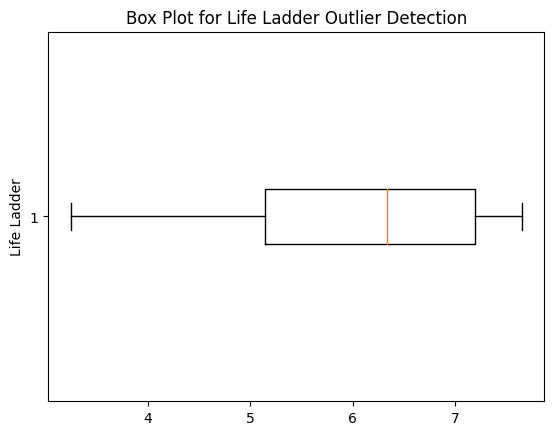

[7.34068823 7.28539085 7.25375748 7.45004702 7.40561628 7.19558573
 7.36416912 7.28855038 7.30906057 7.25008011 7.25703764 7.17699337
 7.23399496 7.13736773 7.11159897 7.0346961  7.02458239 7.41804838
 7.48175287 7.48560381 7.48782444 7.65034628 7.42605352 7.41514444
 7.59379387 7.30425787 7.41277266 7.24484587 7.41486835 7.17549658
 7.1090765  7.02490473 6.93943548 6.91793537 6.84120655 4.56049538
 4.86286211 4.84629488 4.45436096 4.65273666 5.0372076  5.0949173
 5.2410903  5.19561911 5.30387783 5.32495594 5.09906149 5.13143396
 5.14412022 5.77106476 5.86286449 6.14476395 5.34825897 5.02679348
 5.14583302 4.52151775 4.98927736 4.63487148 4.72014666 4.42778873
 4.42437935 4.34207916 4.17917728 4.04611111 3.81806874 3.24876976
 4.22386551 3.55825377 3.92981625 4.6760087  4.96374273 5.22286749
 5.61875391 5.15822792 5.38477325 5.38876629 5.62073565 5.53717756
 6.03697681 5.99553871 5.85494566 5.57874298 5.51350021 5.44052362
 5.49528885 5.44826126 6.04407263 5.86481237 7.18179369 7.51268

In [8]:
# Life ladder
plt.boxplot(df_world_happiness['Life Ladder'],vert=False)
plt.title('Box Plot for Life Ladder Outlier Detection')
plt.ylabel('Life Ladder')
plt.show()

print(df_world_happiness['Life Ladder'].unique())

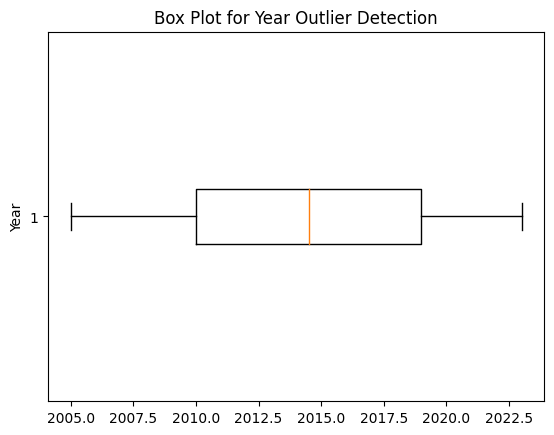

[2005 2007 2008 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020
 2021 2022 2023 2009 2006]


In [9]:
# Year
plt.boxplot(df_world_happiness['Year'],vert=False)
plt.title('Box Plot for Year Outlier Detection')
plt.ylabel('Year')
plt.show()

print(df_world_happiness['Year'].unique())

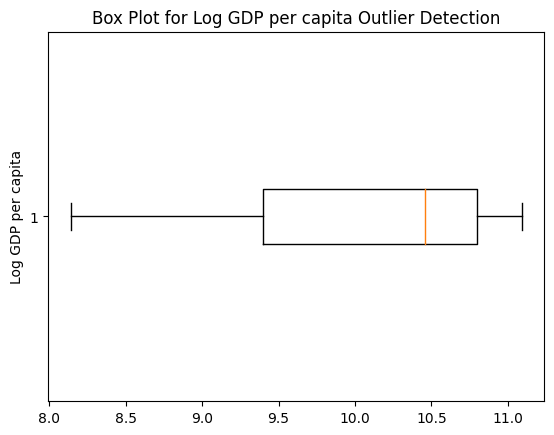

[10.66205788 10.69443417 10.70945644 10.7136488  10.72338581 10.74420547
 10.75245476 10.7630024  10.76990891 10.78122902 10.78726006 10.8006525
 10.80728245 10.79441643 10.81525517 10.83953285 10.84643364 10.70729923
 10.73399258 10.73315716 10.6920433  10.71135616 10.7325449  10.73914337
 10.75160122 10.76984406 10.76895142 10.76759148 10.78554249 10.79881001
 10.80315399 10.74034023 10.78348827 10.79865265 10.79428005  8.69613934
  8.82396793  8.91097355  8.99582863  9.09207344  9.17782688  9.24674225
  9.31487465  9.38020134  9.44243145  9.5029459   9.5640583   9.62469864
  9.67895317  9.69871235  9.77891541  9.86080837  8.14113712  8.20028877
  8.216465    8.27823448  8.34601593  8.38348675  8.42329216  8.47222137
  8.53130245  8.59635067  8.66383171  8.71802044  8.7696867   8.79741669
  8.72778511  8.8064518   8.86733437  8.91947079  9.98771191 10.07100296
 10.12213516 10.04062366 10.08419228 10.12551403 10.16328239 10.17855549
 10.1680479  10.14596653 10.14606953 10.16301918 10.

In [10]:
# Log GDP per capita
plt.boxplot(df_world_happiness['Log GDP per capita'],vert=False)
plt.title('Box Plot for Log GDP per capita Outlier Detection')
plt.ylabel('Log GDP per capita')
plt.show()

print(df_world_happiness['Log GDP per capita'].unique())

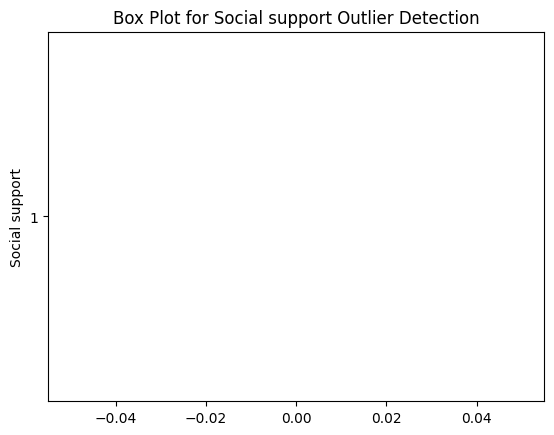

[0.96789217 0.96527618 0.94663519 0.95451957 0.96702921 0.94459903
 0.92820519 0.92379874 0.95186156 0.94233423 0.94995785 0.94013727
 0.94277436 0.936517   0.91975528 0.94167334 0.89646006 0.96155244
        nan 0.93870741 0.94284451 0.95376545 0.92166924 0.94812834
 0.93623936 0.91783631 0.93906707 0.92439252 0.93374896 0.92271876
 0.925304   0.93061072 0.92607641 0.92910153 0.90247291 0.7470113
 0.81085241 0.74828732 0.79803437 0.76775259 0.78717119 0.78781819
 0.77789587 0.82036602 0.79373372 0.74170303 0.77203321 0.78760535
 0.82193589 0.80833447 0.85600698 0.79698253 0.70731807 0.56899267
 0.68359315 0.65285206 0.60480976 0.55259311 0.51057458 0.55282634
 0.62146664 0.61013329 0.61352938 0.60676748 0.63805199 0.56078076
 0.61641151 0.5697329  0.6080451  0.6328966  0.89470738 0.88465637
 0.88231617 0.90807557 0.90881419 0.88341689 0.90129513 0.88085699
 0.93175542 0.92436326 0.91092736 0.8961513  0.9087261  0.91009885
 0.88702017 0.86171657 0.91985101 0.85375488 0.96457177 0.95258

In [13]:
# Social support
plt.boxplot(df_world_happiness['Social support'],vert=False)
plt.title('Box Plot for Social support Outlier Detection')
plt.ylabel('Social support')
plt.show()

print(df_world_happiness['Social support'].unique())

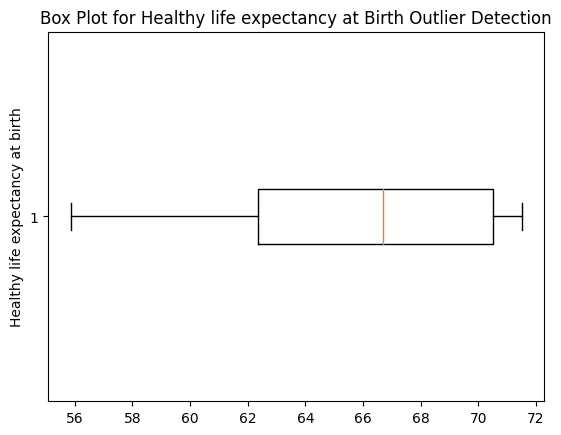

[69.80000305 69.95999908 70.04000092 70.19999695 70.27999878 70.36000061
 70.44000244 70.51999664 70.59999847 70.67500305 70.75       70.82499695
 70.90000153 70.97499847 71.05000305 71.125      71.19999695 70.5
 70.62000275 70.68000031 70.73999786 70.80000305 70.86000061 70.91999817
 70.98000336 71.04000092 71.09999847 71.15000153 71.25       71.30000305
 71.34999847 71.40000153 71.44999695 71.5        65.66000366 65.91999817
 66.18000031 66.44000244 66.69999695 66.95999908 67.22000122 67.48000336
 67.73999786 68.         68.125      68.25       68.375      68.5
 68.625      68.75       69.         55.86000061 56.22000122 56.58000183
 56.93999863 57.29999924 57.65999985 58.02000046 58.38000107 58.74000168
 59.09999847 59.40000153 59.70000076 60.         60.29999924 60.59999847
 60.90000153 61.20000076 61.5        59.18000031 59.61999893 60.06000137
 60.5        60.93999863 61.38000107 61.81999969 62.25999832 62.70000076
 63.07500076 63.45000076 63.82500076 64.19999695 64.57499695 64.9

In [14]:
# Healthy life expectancy at birth
plt.boxplot(df_world_happiness['Healthy life expectancy at birth'],vert=False)
plt.title('Box Plot for Healthy life expectancy at Birth Outlier Detection')
plt.ylabel('Healthy life expectancy at birth')
plt.show()

print(df_world_happiness['Healthy life expectancy at birth'].unique())




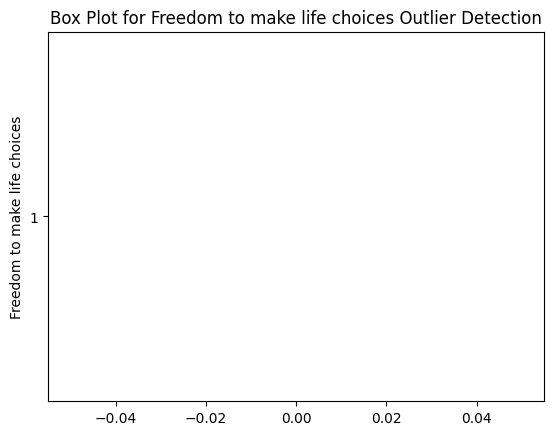

[0.9349733  0.89068198 0.91573334 0.93205857 0.94458646 0.93514627
 0.93337917 0.92293227 0.92187101 0.92231572 0.91055018 0.91602814
 0.91753691 0.90528297 0.91240221 0.85377699 0.87576878 0.95730627
 0.9303413  0.92631495 0.91505784 0.93394881 0.95092529 0.91796112
 0.9160139  0.93889761 0.93146896 0.91242391 0.94514501 0.9457829
 0.91152561 0.8868922  0.89822918 0.83826393 0.84709644        nan
 0.85307205 0.77114326 0.8047936  0.82416236 0.80825514 0.80472392
 0.8776176  0.8953777  0.92735624 0.891123   0.8747555  0.79337835
 0.77373707 0.72889262 0.75583965 0.67864364 0.78306037 0.83755165
 0.6093201  0.74017662 0.80938292 0.77722526 0.82006878 0.88585043
 0.89044338 0.87554032 0.90641594 0.86611092 0.89313102 0.89960104
 0.64338821 0.59256971 0.64277828 0.61711514 0.613159   0.62584758
 0.60910416 0.66118556 0.74433208 0.68545473 0.7136063  0.73087424
 0.7292822  0.71476609 0.71446645 0.67081016 0.77606386 0.74996614
 0.9114961  0.87190378 0.87795627 0.83068383 0.82804435 0.86320

In [15]:
plt.boxplot(df_world_happiness['Freedom to make life choices'],vert=False)
plt.title('Box Plot for Freedom to make life choices Outlier Detection')
plt.ylabel('Freedom to make life choices')
plt.show()

print(df_world_happiness['Freedom to make life choices'].unique())


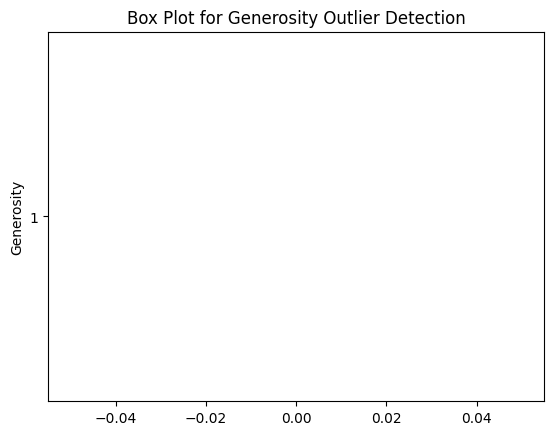

[        nan  0.34163693  0.29993275  0.31133416  0.36397728  0.26827726
  0.26342756  0.31316435  0.32653266  0.23321636  0.31202361  0.14116128
  0.1151715   0.20151484  0.23427069  0.15275647  0.18730904  0.24624279
  0.24381898  0.25592694  0.2405701   0.22479765  0.24749194  0.28435245
  0.30998209  0.26418811  0.2471514   0.20549303  0.15732986  0.09999175
  0.1053291   0.04283147  0.1888295   0.22014138  0.19603276 -0.18168691
 -0.097941   -0.1659753  -0.13884141 -0.19188473 -0.19006507 -0.16306271
 -0.22198972 -0.24961975 -0.23270218 -0.1799988  -0.16368626 -0.17812397
 -0.10870942  0.01962698 -0.03157096 -0.05624353 -0.07693359 -0.03099106
  0.05284017 -0.04278817  0.06236007  0.07935514 -0.03064215 -0.00996141
  0.04114192 -0.04638054  0.07996451  0.10780876  0.06756982  0.05212269
  0.08546411  0.12088692 -0.31214404 -0.28935009 -0.31063604 -0.2889818
 -0.30197862 -0.28445572 -0.29825288 -0.29497126 -0.27019766 -0.17669198
 -0.1868787  -0.15059799 -0.1529755  -0.12199596 -0.

In [16]:
plt.boxplot(df_world_happiness['Generosity'],vert=False)
plt.title('Box Plot for Generosity Outlier Detection')
plt.ylabel('Generosity')
plt.show()

print(df_world_happiness['Generosity'].unique())

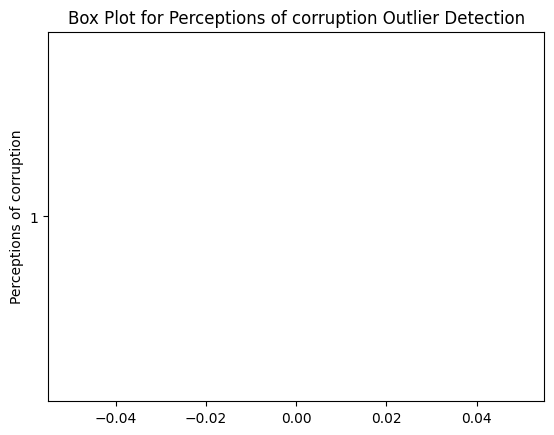

[0.39041594 0.51257849 0.43081051 0.3661274  0.38177174 0.36825174
 0.43153903 0.44202137 0.35655439 0.39854512 0.41134652 0.4046475
 0.43020865 0.49109483 0.45367604 0.54521698 0.48158047 0.5026812
 0.40560842 0.36958781 0.41262212 0.41265959 0.43299153 0.46560183
 0.40623614 0.44173533 0.42715225 0.38509044 0.36203432 0.37174085
 0.43643442 0.43401235 0.3839905  0.44200018 0.46792513        nan
 0.85481173 0.86214286 0.89118844 0.89461106 0.86254805 0.90779352
 0.82961476 0.83235633 0.832142   0.77643496 0.76472211 0.78080279
 0.80526334 0.75197941 0.78012711 0.75682002 0.770742   0.7698518
 0.93510175 0.93346411 0.92409039 0.95360172 0.93657196 0.93513042
 0.93751794 0.93380451 0.86926728 0.91341829 0.92546272 0.86159021
 0.86531156 0.84770507 0.82304752 0.80783927 0.76652265 0.73343468
 0.60030866 0.63303512 0.66849548 0.66539383 0.68958259 0.69692576
 0.71003443 0.74689406 0.70226747 0.69754261 0.73891956 0.68119127
 0.70992827 0.70671552 0.67812461 0.68659157 0.70112753 0.7217009

In [17]:
plt.boxplot(df_world_happiness['Perceptions of corruption'],vert=False)
plt.title('Box Plot for Perceptions of corruption Outlier Detection')
plt.ylabel('Perceptions of corruption')
plt.show()

print(df_world_happiness['Perceptions of corruption'].unique())

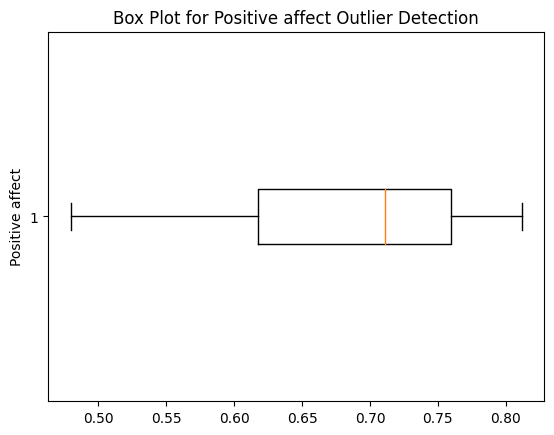

[0.76977032 0.76230389 0.72899228 0.76171553 0.7241323  0.72809237
 0.77014714 0.73981529 0.74950367 0.73589551 0.72814983 0.70598274
 0.72697622 0.72568893 0.73980016 0.71077186 0.73105311 0.78329885
 0.8115772  0.80222368 0.79321092 0.79104245 0.80289984 0.77556878
 0.80063403 0.79068267 0.79170895 0.76776469 0.79935777 0.7725594
 0.78072155 0.73848534 0.76282668 0.71948266 0.72632343 0.65765876
 0.66397744 0.70513326 0.66966599 0.65810096 0.71005481 0.68915981
 0.71713585 0.70976311 0.66682726 0.68325591 0.68166518 0.72157866
 0.7602669  0.66296101 0.69780982 0.70798516 0.576096   0.54132956
 0.57261389 0.63858569 0.57922548 0.4797596  0.5435065  0.60828298
 0.65104282 0.65720093 0.64588916 0.57883108 0.5905602  0.56040317
 0.68647724 0.54730844 0.5963546  0.6987651  0.53352481 0.54587799
 0.57020974 0.53951323 0.56738126 0.56426483 0.56256437 0.59229654
 0.61663437 0.60934603 0.58674085 0.6505639  0.61501139 0.63202417
 0.62099171 0.5900864  0.61367172 0.61614472 0.77483273 0.75591

In [18]:
plt.boxplot(df_world_happiness['Positive affect'],vert=False)
plt.title('Box Plot for Positive affect Outlier Detection')
plt.ylabel('Positive affect')
plt.show()

print(df_world_happiness['Positive affect'].unique())

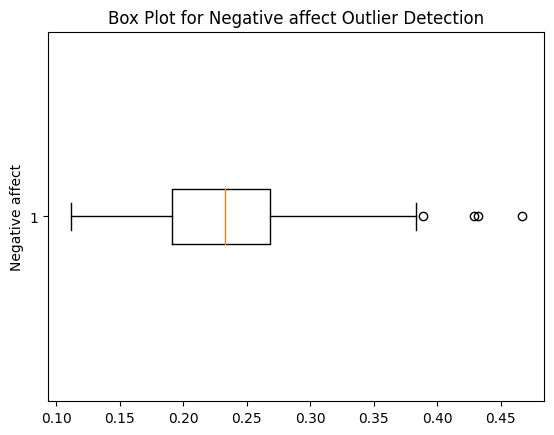

[0.23801209 0.21535064 0.21842732 0.22007321 0.19532368 0.21439691
 0.17714226 0.2453043  0.20963697 0.23608579 0.22536097 0.18745637
 0.20219007 0.20507768 0.23531418 0.24391972 0.24816282 0.23327816
 0.25681007 0.20217495 0.24763316 0.23311286 0.24772866 0.22933209
 0.26285031 0.25860241 0.28628021 0.23742287 0.21798116 0.25939766
 0.28483376 0.30667374 0.27623281 0.28674775 0.30365962 0.16958039
 0.15861352 0.14696305 0.16165024 0.15809965 0.13350345 0.158703
 0.14221105 0.11151771 0.17131498 0.14562516 0.21400476 0.18963979
 0.14651184 0.24491823 0.23961844 0.21035005 0.19860162 0.2525022
 0.25931546 0.30062133 0.26650202 0.23159449 0.29484102 0.33043736
 0.28458205 0.32182944 0.34568146 0.31793678 0.35745808 0.46633562
 0.38329312 0.42913789 0.43226436 0.38852569 0.23242915 0.19284636
 0.16590188 0.16897927 0.17142096 0.16523495 0.17360449 0.17992376
 0.15134692 0.13000593 0.14249723 0.19456053 0.1987963  0.20042156
 0.18952154 0.1900727  0.21120417 0.19040261 0.26051095 0.2316792

In [19]:
plt.boxplot(df_world_happiness['Negative affect'],vert=False)
plt.title('Box Plot for Negative affect Outlier Detection')
plt.ylabel('Negative affect')
plt.show()

print(df_world_happiness['Negative affect'].unique())

In [97]:
display(df_country_comparison.head())

# rename USA to United States to match the world happiness dataset

df_country_comparison['Country'] = df_country_comparison['Country'].replace('USA', 'United States')

#stripping white space
df_world_happiness.columns = df_world_happiness.columns.str.strip()
df_country_comparison.columns = df_country_comparison.columns.str.strip()

merged_df = pd.merge(df_world_happiness, df_country_comparison, on=['Country', 'Year'], how='inner')

merged_df.head()
merged_df.shape

merged_df.info()

# missing values in
# social support
# freedom to make life choices
# perceptions of corruption
# generosity




,Country,Year,GDP (in Trillions USD),GDP per Capita (in USD),Inflation Rate (%),Population (in Millions),Population Growth Rate (%),Urban Population (%),Life Expectancy (Years),Healthcare Expenditure per Capita (USD),...,Poverty Rate (%),Number of International Visitors (in Millions),Tourism Revenue (in Billion USD),Agricultural Land (%),Unemployment Rate (%),Labor Force Participation Rate (%),"Crime Rate (per 100,000)",Corruption Perception Index,Freedom of Press Index,Voting Participation Rate (%)
0,United States,2000,20.87,65455.0,2.28,330.34,0.58,83.42,78.39,11209.00,...,10.98,80.80,210.98,42.37,3.55,65.52,287.40,67.41,45.27,68.81
1,Russia,2000,1.64,10923.0,3.25,141.81,0.10,72.67,69.91,534.45,...,12.89,24.70,36.47,12.53,4.63,57.54,497.50,30.90,146.10,65.00
2,Canada,2000,1.65,47932.0,1.96,36.63,0.90,79.54,84.60,5113.50,...,9.46,22.33,29.52,7.22,5.43,65.06,795.20,74.74,16.42,63.00
3,China,2000,13.64,10060.0,2.43,1446.93,0.31,58.56,76.09,459.00,...,2.04,62.20,115.80,54.00,3.68,63.13,102.90,41.75,185.32,72.14
4,India,2000,2.98,2102.1,4.87,1313.76,1.04,34.09,68.78,76.07,...,22.25,11.25,29.12,57.60,7.31,52.10,245.25,40.12,136.36,67.65


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 45 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Country                                         106 non-null    object 
 1   Year                                            106 non-null    int64  
 2   Life Ladder                                     106 non-null    float64
 3   Log GDP per capita                              106 non-null    float64
 4   Social support                                  104 non-null    float64
 5   Healthy life expectancy at birth                106 non-null    float64
 6   Freedom to make life choices                    101 non-null    float64
 7   Generosity                                      102 non-null    float64
 8   Perceptions of corruption                       89 non-null     float64
 9   Positive affect                            

In [98]:
# Freedom to make life choices filling in the missing data
median_value = merged_df['Generosity'].median()
median_value = int(median_value)
merged_df['Generosity']= merged_df['Generosity'].fillna(median_value)

In [99]:
# Social support filling in the missing data
median_value = merged_df['Social support'].median()
median_value = int(median_value)
merged_df['Social support']= merged_df['Social support'].fillna(median_value)

In [100]:
# Perceptions of corruption filling in the missing data
median_value = merged_df['Perceptions of corruption'].median()
median_value = int(median_value)
merged_df['Perceptions of corruption']= merged_df['Perceptions of corruption'].fillna(median_value)


In [101]:
# Freedom to make life choices filling in the missing data
median_value = merged_df['Freedom to make life choices'].median()
median_value = int(median_value)
merged_df['Freedom to make life choices']= merged_df['Freedom to make life choices'].fillna(median_value)

In [102]:
merged_df.info()
merged_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 45 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Country                                         106 non-null    object 
 1   Year                                            106 non-null    int64  
 2   Life Ladder                                     106 non-null    float64
 3   Log GDP per capita                              106 non-null    float64
 4   Social support                                  106 non-null    float64
 5   Healthy life expectancy at birth                106 non-null    float64
 6   Freedom to make life choices                    106 non-null    float64
 7   Generosity                                      106 non-null    float64
 8   Perceptions of corruption                       106 non-null    float64
 9   Positive affect                            

,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,...,Poverty Rate (%),Number of International Visitors (in Millions),Tourism Revenue (in Billion USD),Agricultural Land (%),Unemployment Rate (%),Labor Force Participation Rate (%),"Crime Rate (per 100,000)",Corruption Perception Index,Freedom of Press Index,Voting Participation Rate (%)
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,...,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,2014.462264,6.114565,10.089651,0.829477,66.060047,0.791166,0.051330,0.546397,0.690947,0.236934,...,11.065849,35.280472,82.521698,38.206887,5.005849,61.019717,474.921698,55.073774,92.285377,69.885755
std,5.215681,1.185722,0.902424,0.168624,4.565608,0.200702,0.190152,0.301657,0.081433,0.065683,...,5.855160,27.231909,70.832695,21.017962,1.341535,5.626838,290.923446,18.618202,65.405531,10.521994
min,2005.000000,3.248770,8.141137,0.000000,55.860001,0.000000,-0.312144,0.000000,0.479760,0.111518,...,1.910000,9.050000,26.850000,6.730000,3.430000,47.700000,95.300000,28.560000,15.280000,57.240000
25%,2010.000000,5.144548,9.395759,0.787280,62.369999,0.745741,-0.106017,0.392448,0.617724,0.191014,...,9.327500,10.977500,30.015000,12.970000,3.760000,58.665000,250.750000,40.000000,25.297500,63.452500
50%,2014.500000,6.332818,10.454458,0.902833,66.689999,0.849600,0.079660,0.616672,0.711184,0.233196,...,10.090000,23.370000,36.525000,45.055000,4.760000,62.025000,395.350000,54.820000,90.220000,67.400000
75%,2019.000000,7.192138,10.794382,0.928877,70.514997,0.911518,0.212246,0.780634,0.759562,0.268029,...,12.360000,64.655000,121.500000,55.267500,5.600000,65.435000,792.200000,72.647500,150.712500,70.885000
max,2023.000000,7.650346,11.089293,0.967892,71.500000,0.957306,0.363977,0.953602,0.811577,0.466336,...,22.970000,83.600000,230.340000,62.940000,7.870000,69.230000,943.200000,80.850000,185.320000,96.600000


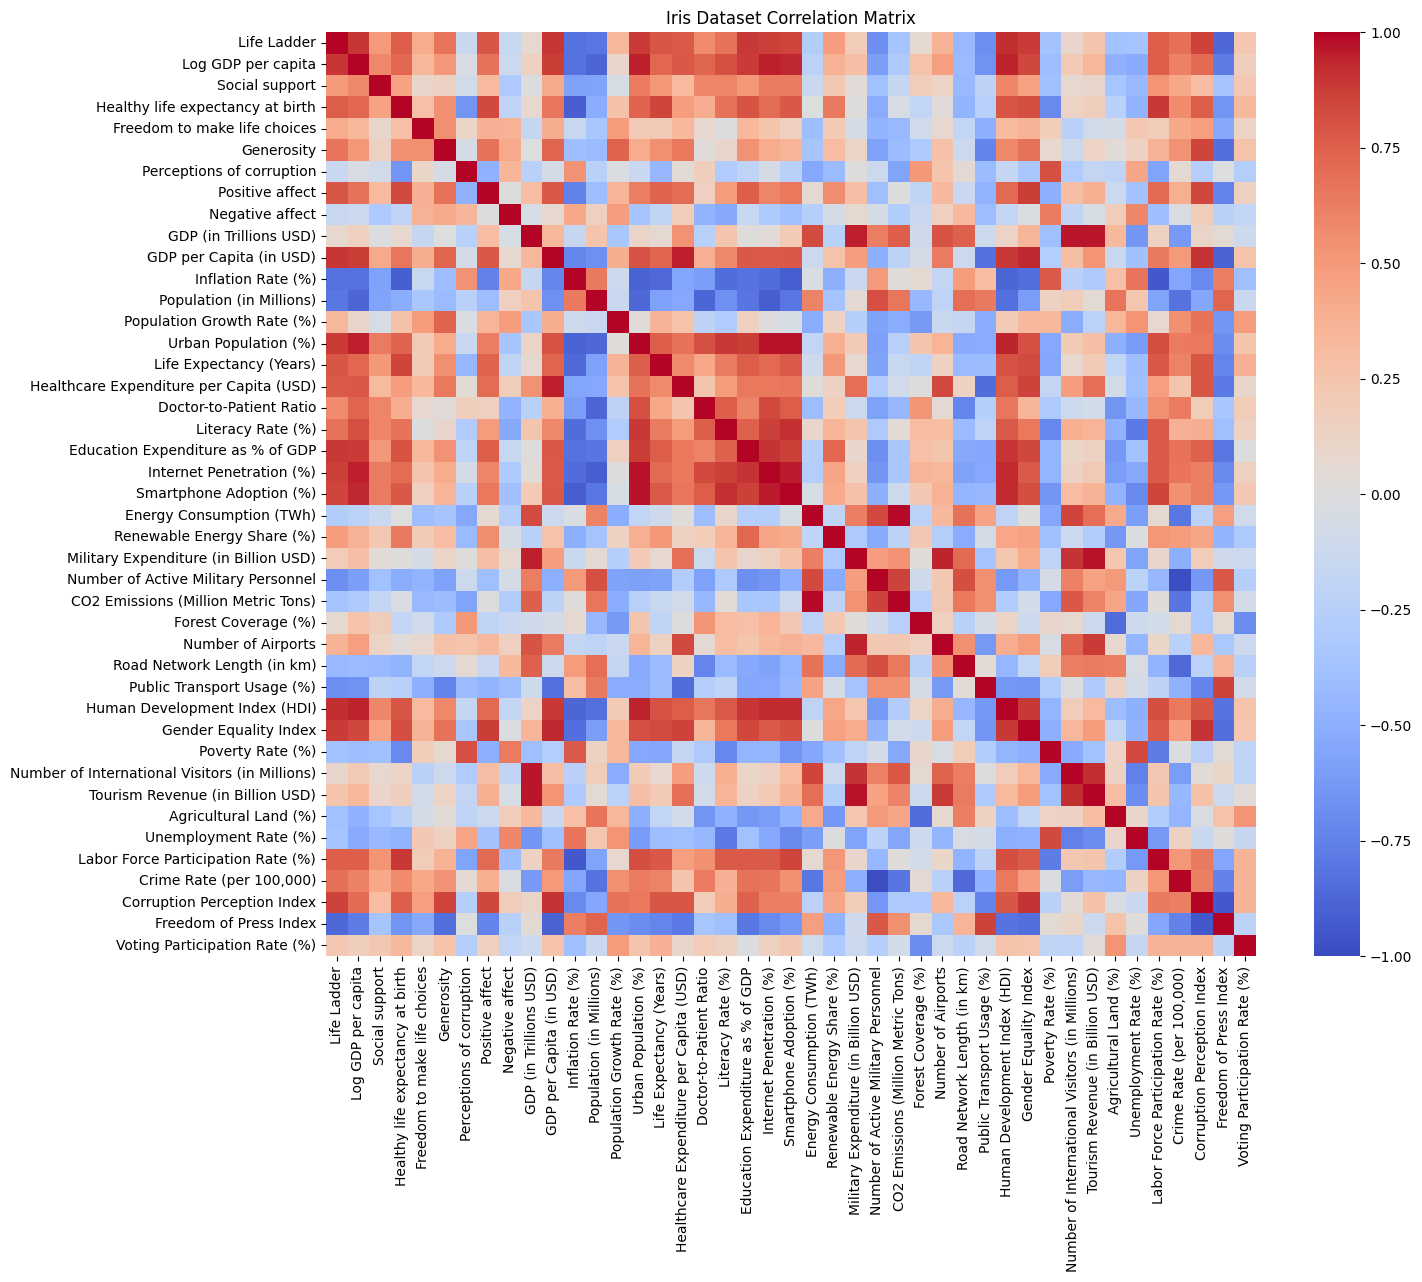

In [103]:
# correlation matrix

# Select only numerical columns
numeric_df = merged_df.select_dtypes(include=['number'])
numeric_df= numeric_df.drop(columns=['Year'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()
plt.figure(figsize=(15, 12))  # Adjust size to fit the heatmap
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Iris Dataset Correlation Matrix")
plt.show()

In [ ]:
# The level of positive emotions such as joy and contentment experienced by individuals.

# Rescale Positive affect from 0-1 to 0-100
# df['Positive affect'] = df['Positive affect'] * 100

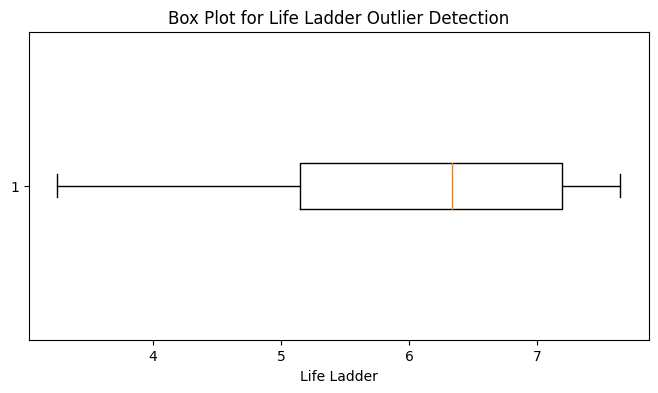

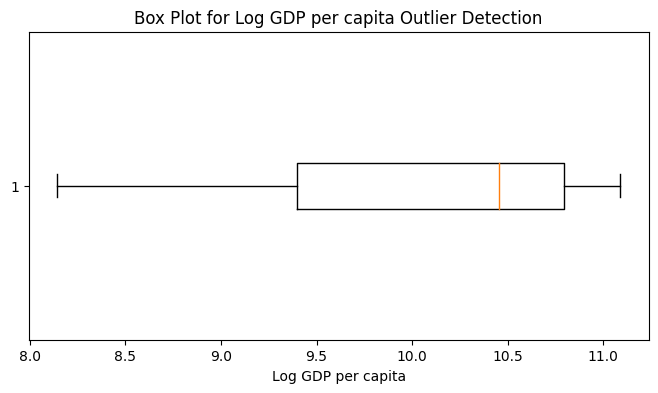

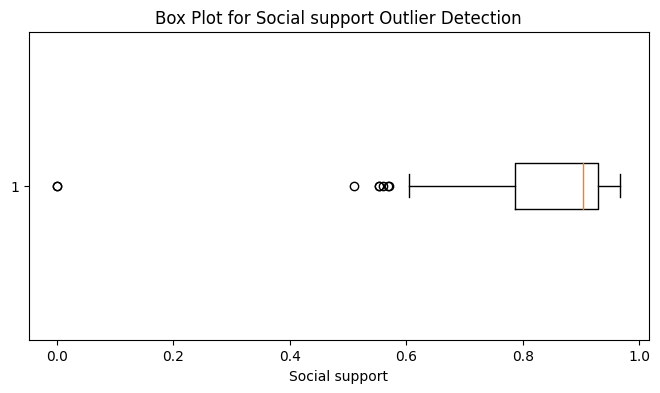

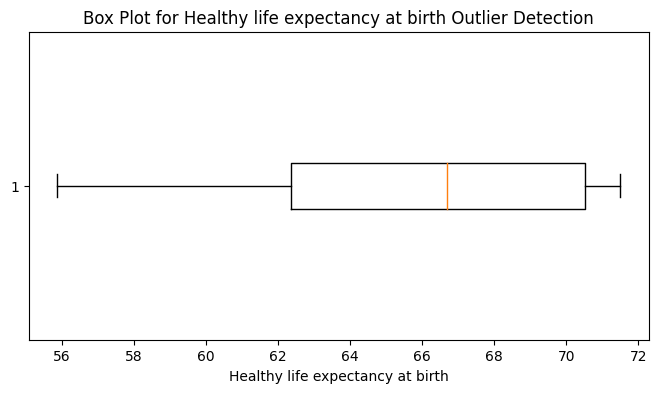

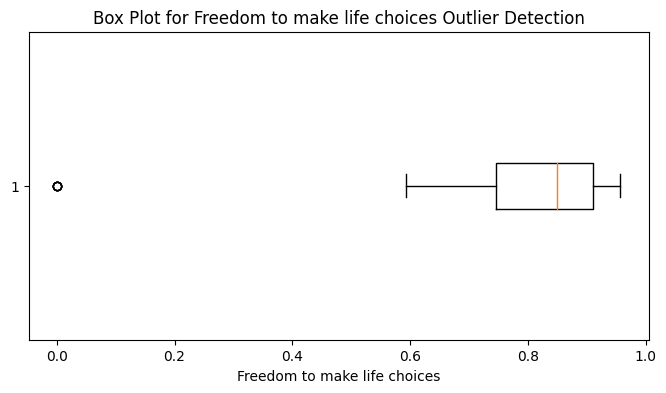

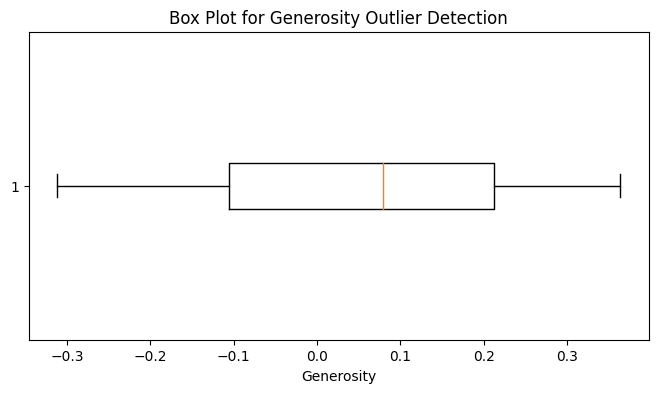

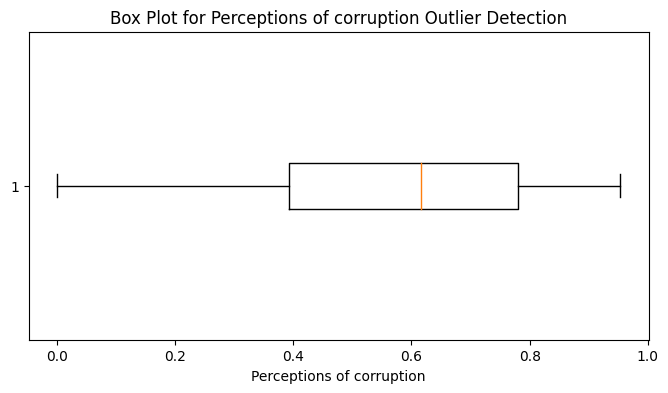

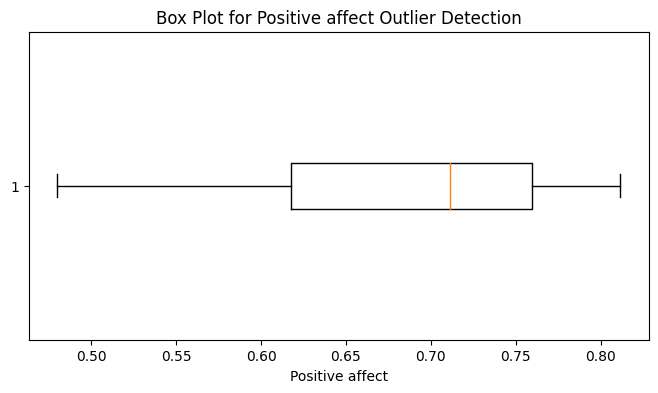

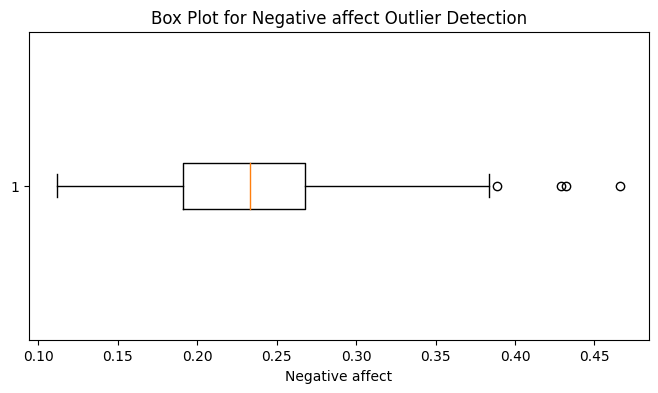

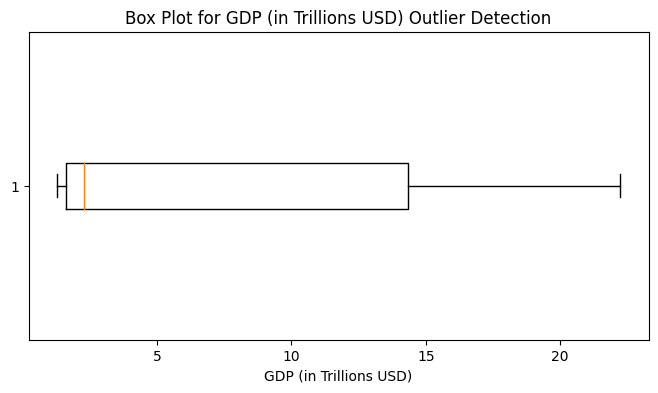

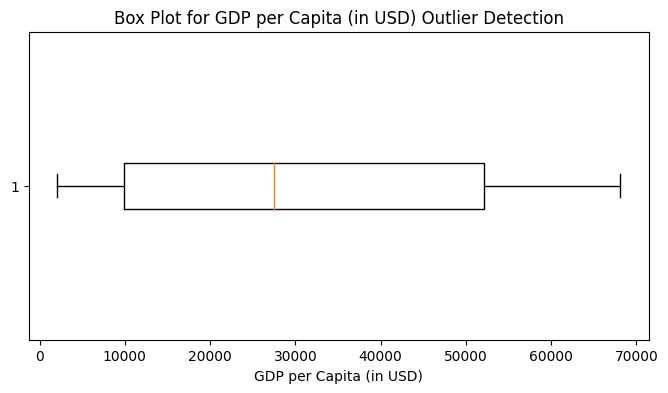

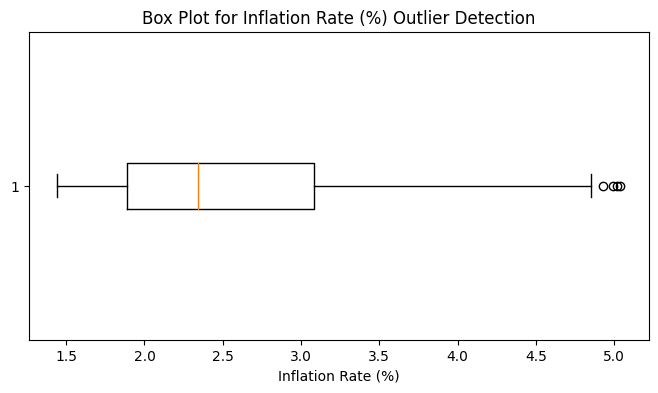

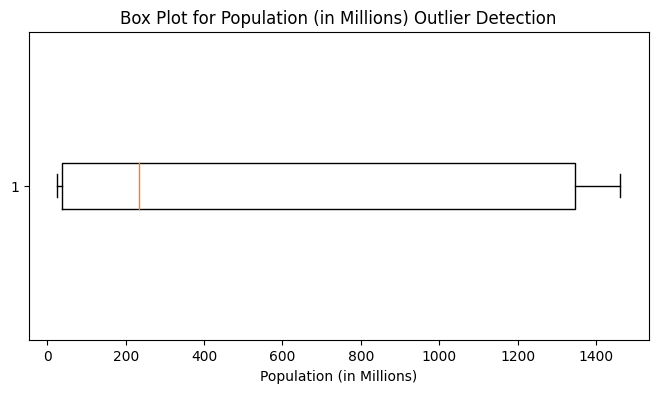

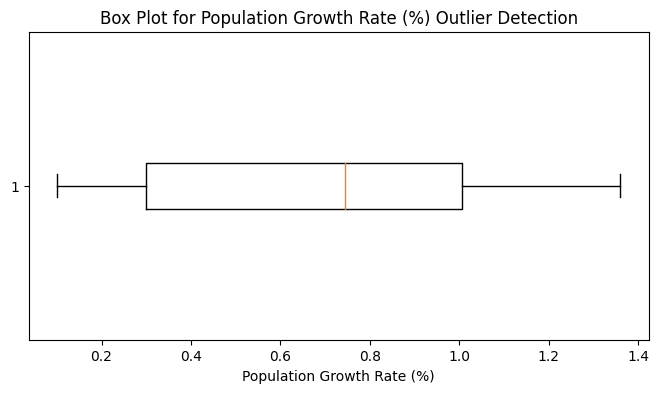

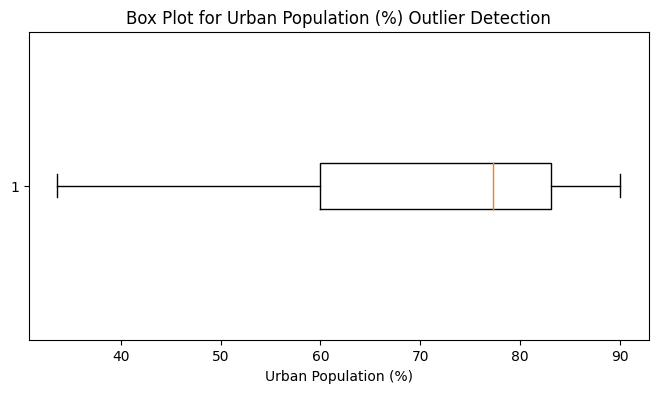

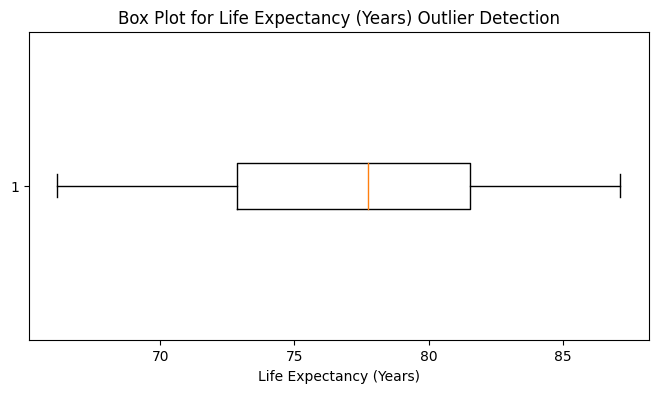

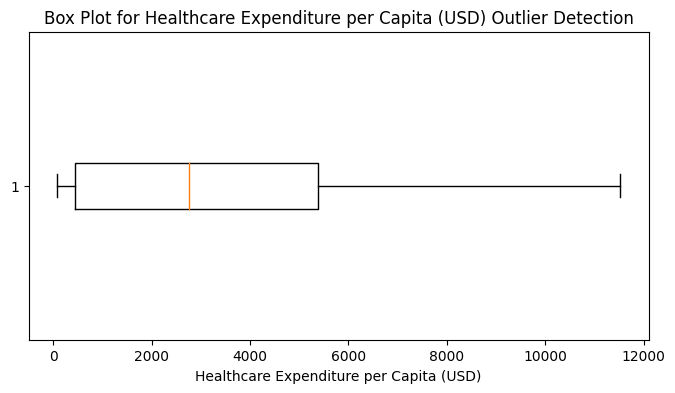

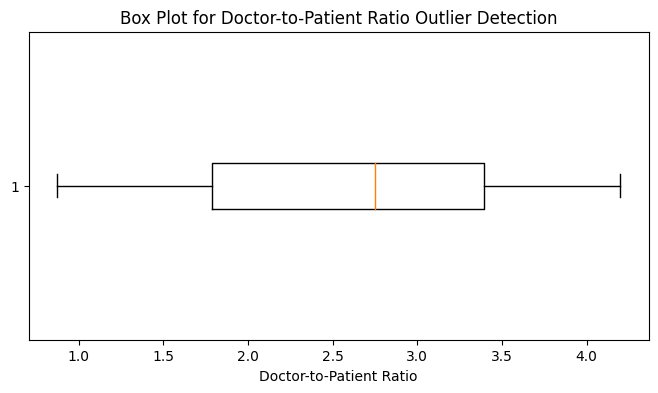

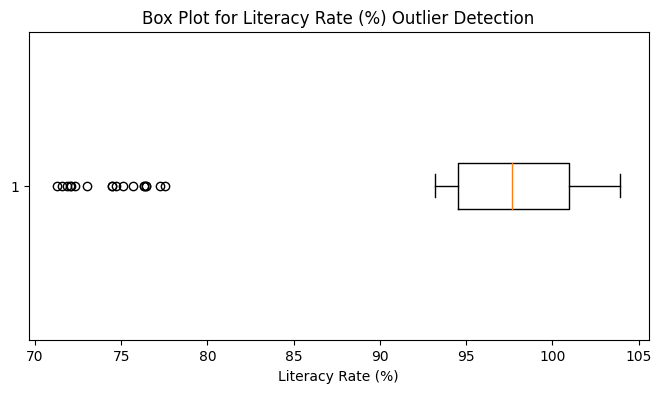

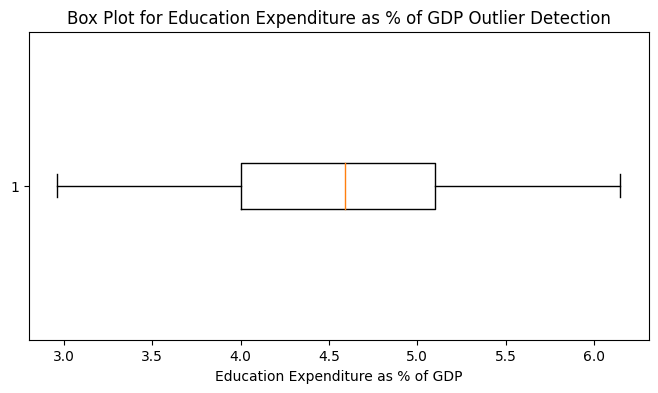

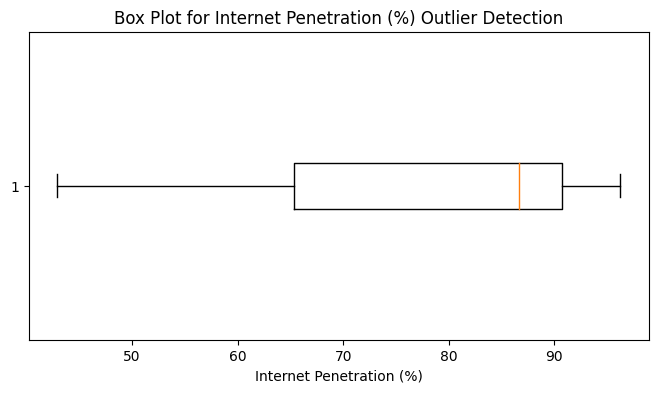

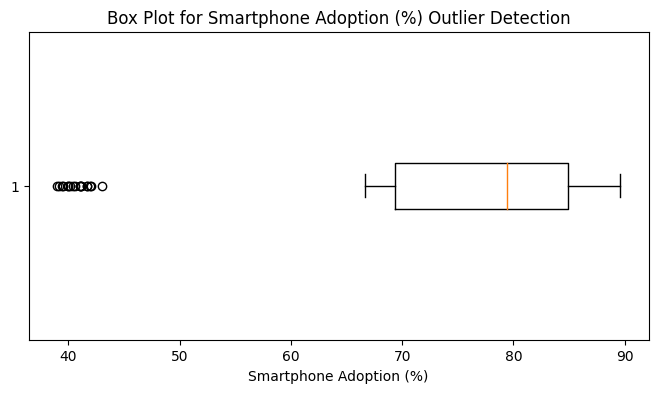

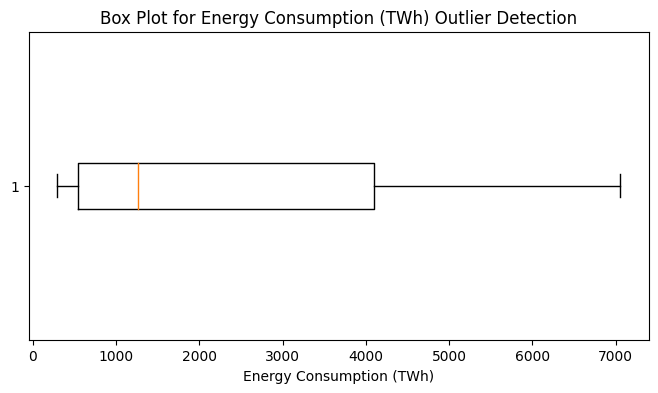

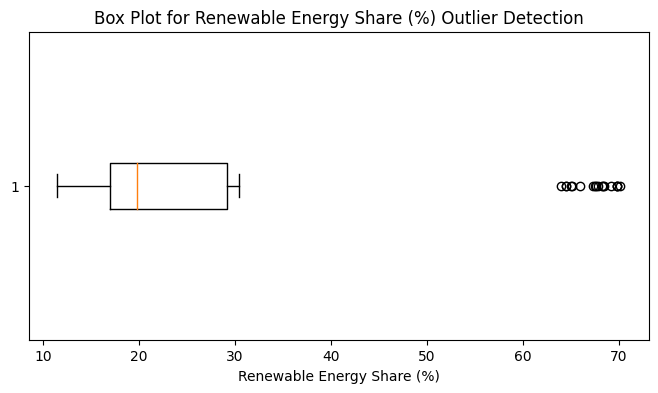

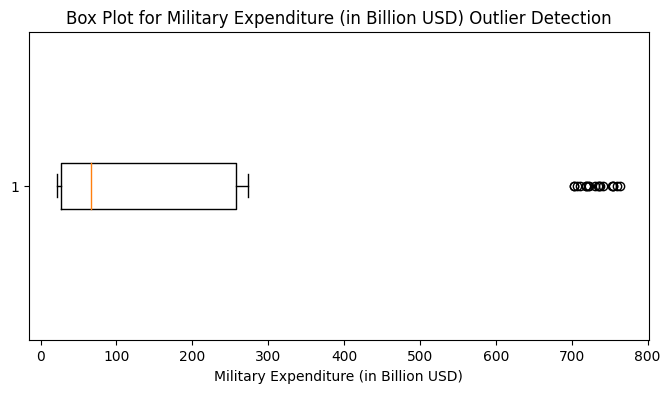

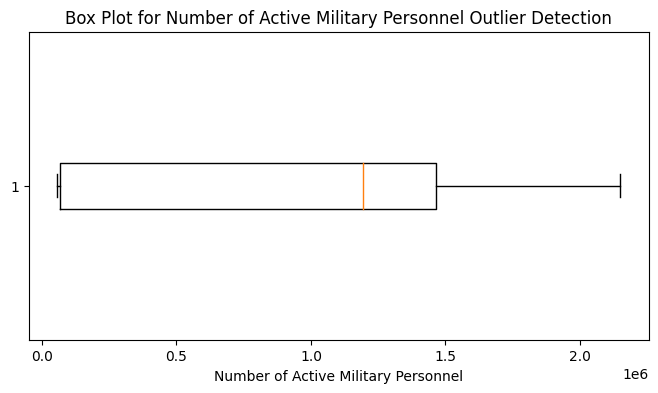

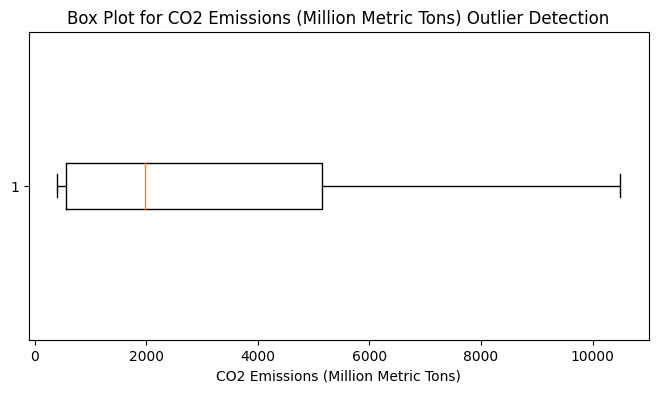

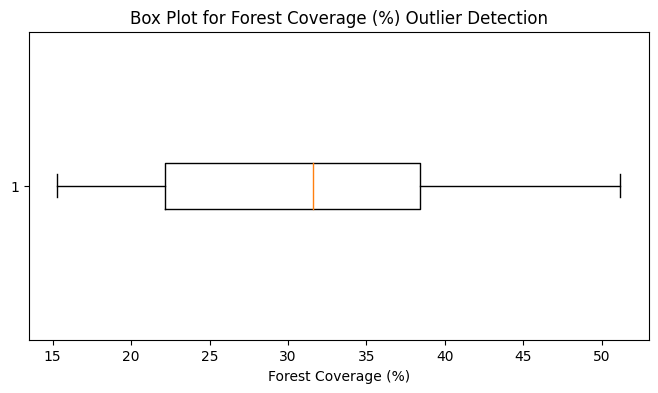

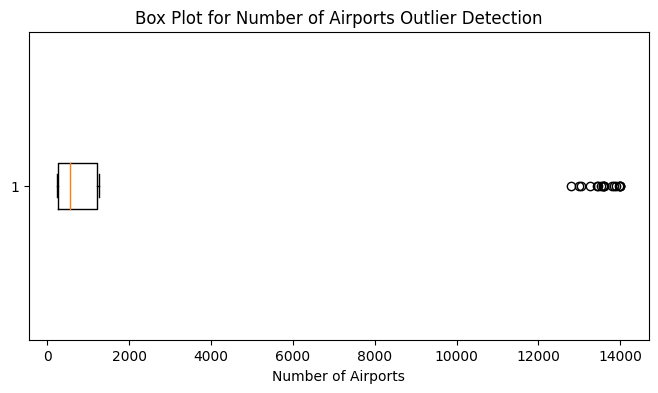

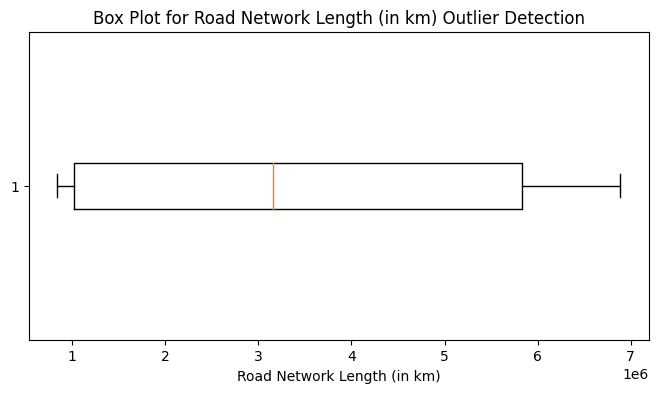

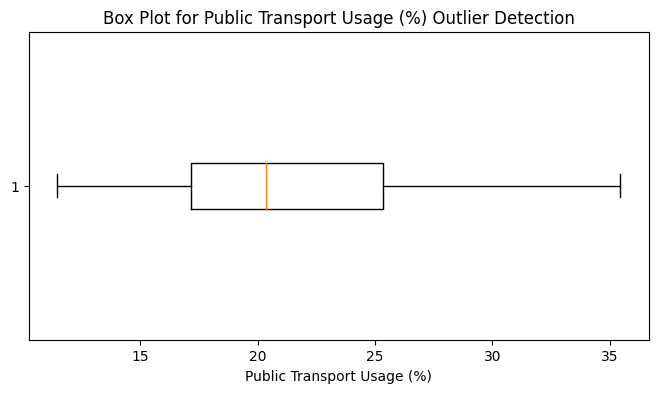

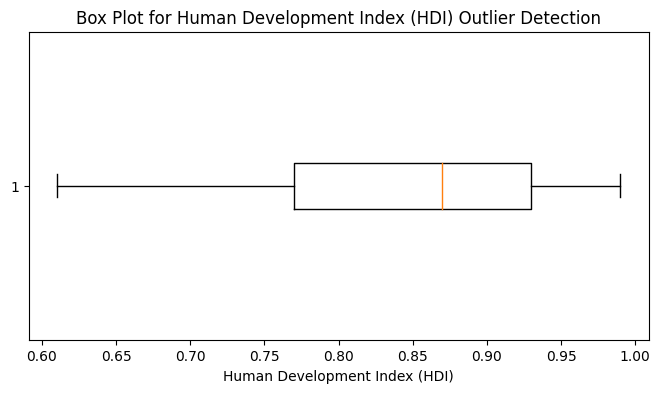

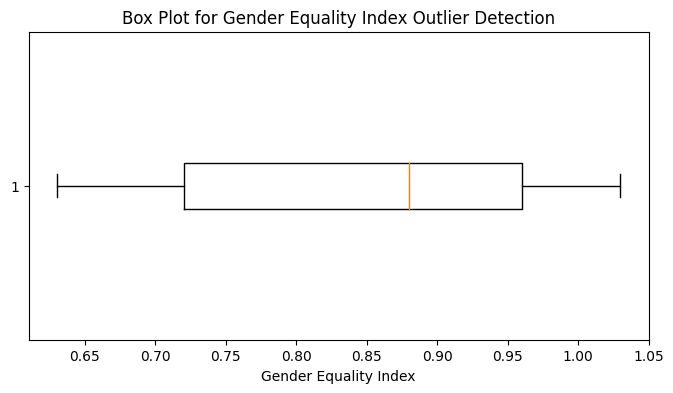

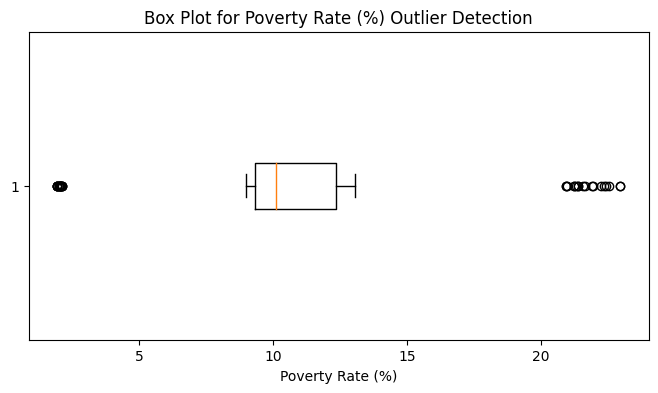

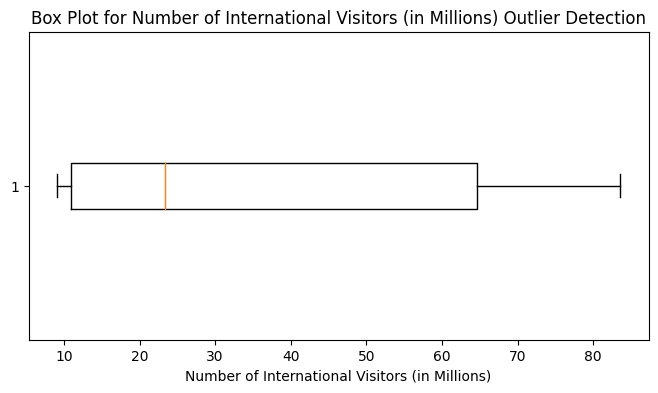

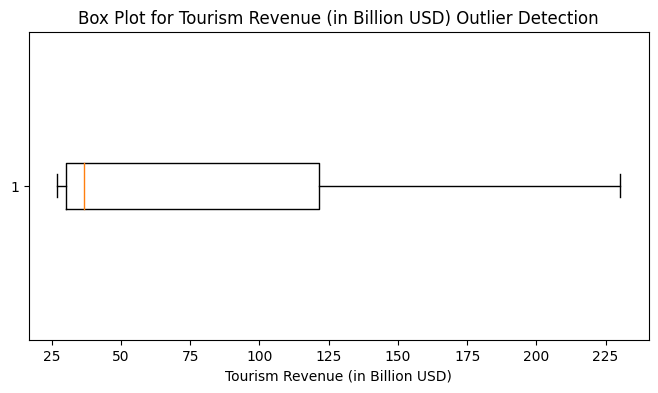

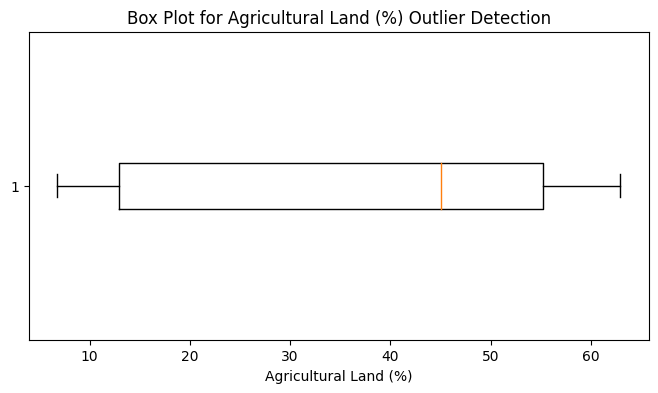

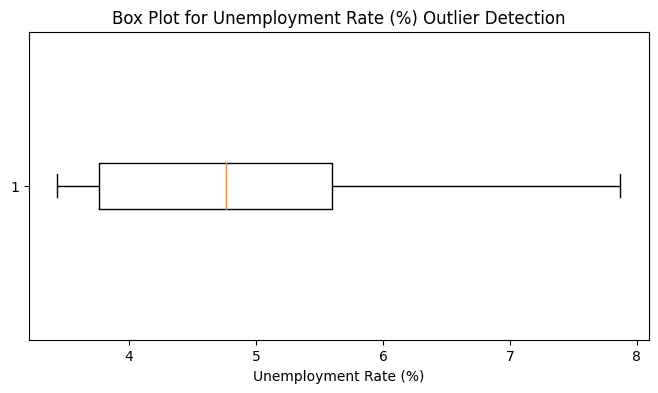

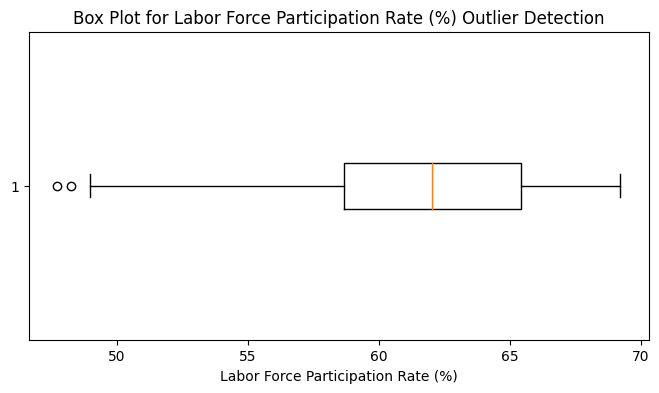

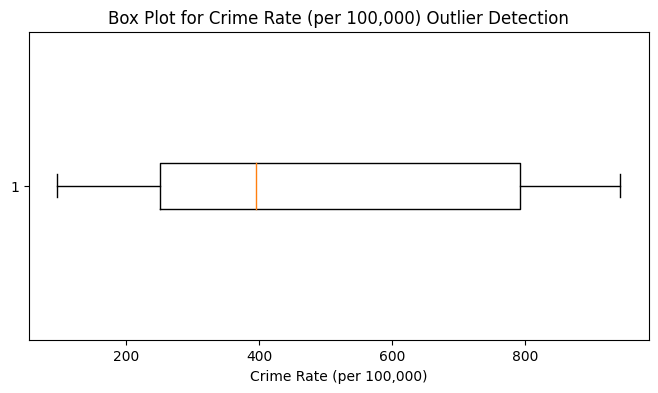

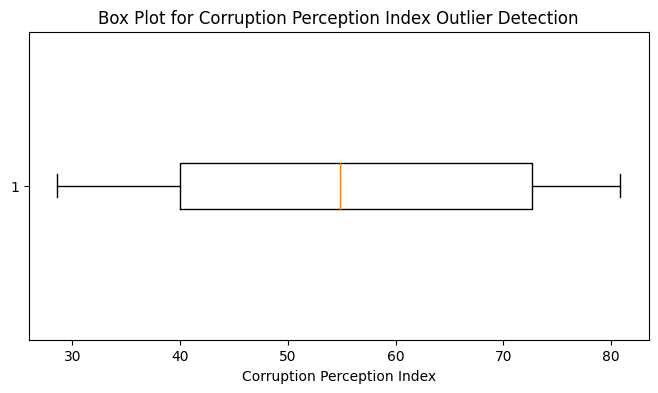

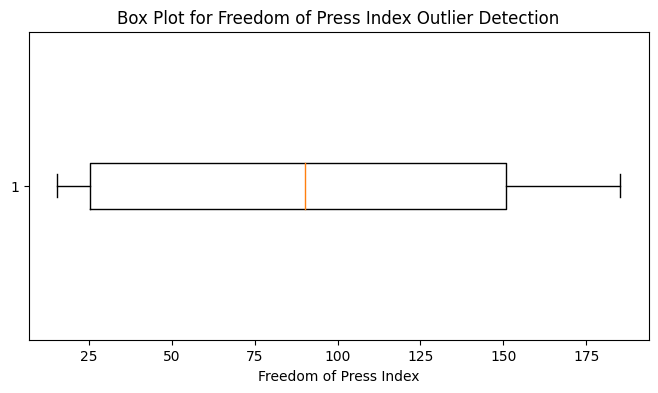

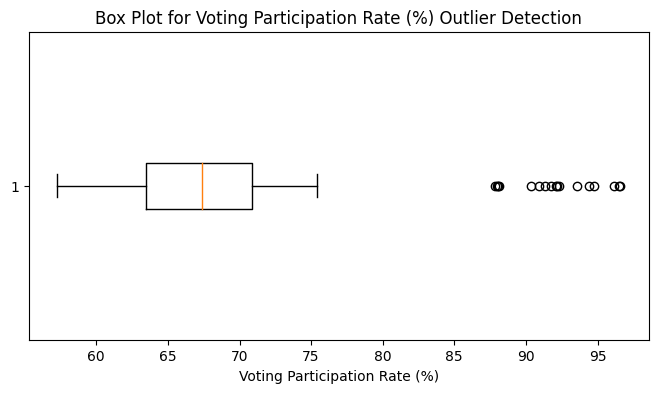

In [104]:
# Loop through each numeric column to create box plots and show distribution
for feature in numeric_df:
    plt.figure(figsize=(8, 4))  # Adjust the figure size as needed
    plt.boxplot(numeric_df[feature], vert=False)
    plt.title(f'Box Plot for {feature} Outlier Detection')
    plt.xlabel(feature)  # Use xlabel for horizontal box plot
    plt.show()  # Display the box plot

In [126]:

print(merged_df.isnull().sum())
print(merged_df.dtypes)


Country                                           0
Year                                              0
Life Ladder                                       0
Log GDP per capita                                0
Social support                                    0
Healthy life expectancy at birth                  0
Freedom to make life choices                      0
Generosity                                        0
Perceptions of corruption                         0
Positive affect                                   0
Negative affect                                   0
GDP (in Trillions USD)                            0
GDP per Capita (in USD)                           0
Inflation Rate (%)                                0
Population (in Millions)                          0
Population Growth Rate (%)                        0
Urban Population (%)                              0
Life Expectancy (Years)                           0
Healthcare Expenditure per Capita (USD)           0
Doctor-to-Pa

In [127]:
# Creating training data and target data using positive affect as dependent variable
df_positive = merged_df
X = df_positive.drop(['Positive affect', 'Country', 'Year', 'Negative affect'], axis=1)  # Drop non-numeric or unnecessary columns
y = df_positive['Positive affect']  # Target variable

# Scaling data for gradient descent
# Use MinMax scale
# Feature scaling

scaler = MinMaxScaler()
# Fit the scaler to the features and transform them
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)




In [128]:
# Convert to NumPy arrays
X = X_scaled.values
y = y.values
# reshaping y
y = y.reshape(-1, 1)
# Creating theta matrix
# Add a bias term (intercept) to X
X = np.c_[np.ones(X.shape[0]), X]  # Add a column of ones for the intercept term
theta = np.zeros((X.shape[1], 1))

In [129]:
# Checking the shapes of the terms
X.shape, y.shape, theta.shape

((106, 42), (106, 1), (42, 1))

In [130]:
from sklearn import linear_model
model = linear_model.LinearRegression(fit_intercept = False)
model.fit(X, y)
model.coef_ # get theta coefficients (model params)

array([[ 0.65543777,  0.09820058, -0.06813591,  0.00539123,  0.14291465,
         0.01590812, -0.00740493, -0.12844606,  0.09898488,  0.24571894,
        -0.06050037,  0.17234681, -0.08596275,  0.0080461 , -0.00325366,
        -0.14000145,  0.01618121, -0.09965221,  0.07097258,  0.03013948,
         0.00391656, -0.24528864,  0.02491847,  0.12022362,  0.16541224,
        -0.08763792, -0.0342035 ,  0.25473146, -0.0691589 ,  0.04618865,
        -0.13222555,  0.02881734,  0.04677642, -0.06949658, -0.28727516,
         0.00964043, -0.14720297,  0.03454516, -0.02222502,  0.08682236,
         0.02392296, -0.03730694]])

In [131]:
# function to compute cost of a given solution
def calcVectorizedCost(X, Y, theta):
    inner = np.dot(((np.dot(X, theta)) - Y).T, (np.dot(X, theta)) - Y)
    return inner / (2 * len(X))

In [132]:
calcVectorizedCost(X, y, theta)

array([[0.24198839]])

In [146]:
# Gradient descent function for vectorized form
def gradientDescent(X, Y, theta, eta, iters):

    """
    Performs gradient descent optimization on a set of data

    X: Features matrix
    Y: Output matrix
    theta: matrix of variable weights
    eta: learning rate
    iters: number of times to iterate the algorithm (epochs)
    output: return optimized theta and the cost array for each iteration (epoch).
    """
    cost = np.zeros(iters)

    for i in range(iters):
        gradients = 2 * (np.dot(X.T, ((np.dot(X, theta)) - Y)))
        theta = theta - eta * gradients
        cost[i] = calcVectorizedCost(X, Y, theta)
    return theta, cost

In [172]:
# trying hyper parameters # must use low learning rate so the model can converge
eta = 0.00000001
iters = 1000

In [173]:
optTheta, cost = gradientDescent(X, y, theta, eta, iters)
print (optTheta)

[[0.00144679]
 [0.00097718]
 [0.00099049]
 [0.00124907]
 [0.00098444]
 [0.0012091 ]
 [0.00080964]
 [0.00080273]
 [0.00042706]
 [0.00068273]
 [0.00045587]
 [0.00049972]
 [0.00070871]
 [0.00095783]
 [0.00079826]
 [0.00050694]
 [0.00075848]
 [0.00106055]
 [0.00075384]
 [0.00097617]
 [0.0010204 ]
 [0.00044564]
 [0.00043681]
 [0.00035764]
 [0.00063346]
 [0.00041781]
 [0.00060147]
 [0.00028639]
 [0.00062366]
 [0.00058025]
 [0.00089802]
 [0.00082934]
 [0.00060558]
 [0.0005269 ]
 [0.00041788]
 [0.00080246]
 [0.00049498]
 [0.00092636]
 [0.00067007]
 [0.00078347]
 [0.00060778]
 [0.0004715 ]]


<ipython-input-146-1210d87ba4b3>:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cost[i] = calcVectorizedCost(X, Y, theta)


In [174]:
calcVectorizedCost(X, y, optTheta)

array([[0.23020485]])

In [ ]:
# apply lasso regression

In [175]:
predicted_values = np.dot(X, optTheta)
predicted_values_flat = predicted_values.flatten()  # Ensure it's a 1D array